In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt

boston_dataset = datasets.load_boston()

### Descobrindo as Keys do dicionario e o shape do Data

In [2]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_dataset.data.shape

(506, 13)

### Printando as variaveis preditoras e a descrição do DATASET

In [4]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Transformando o boston.data em um DataSet

In [6]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# todos variaveis nesse dataset, sao nossas variaveis independentes Features
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
# Nossa variavel dependente das features/variaveis independentes
# Portanto, este é nosso target

boston_dataset.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Inputando nosso target como variavel dependente no dataset

In [8]:
df['prices'] = boston_dataset.target

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  prices  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

### Visualizando correlação entre as variavies e outros pontos que possam ajudar no modelo

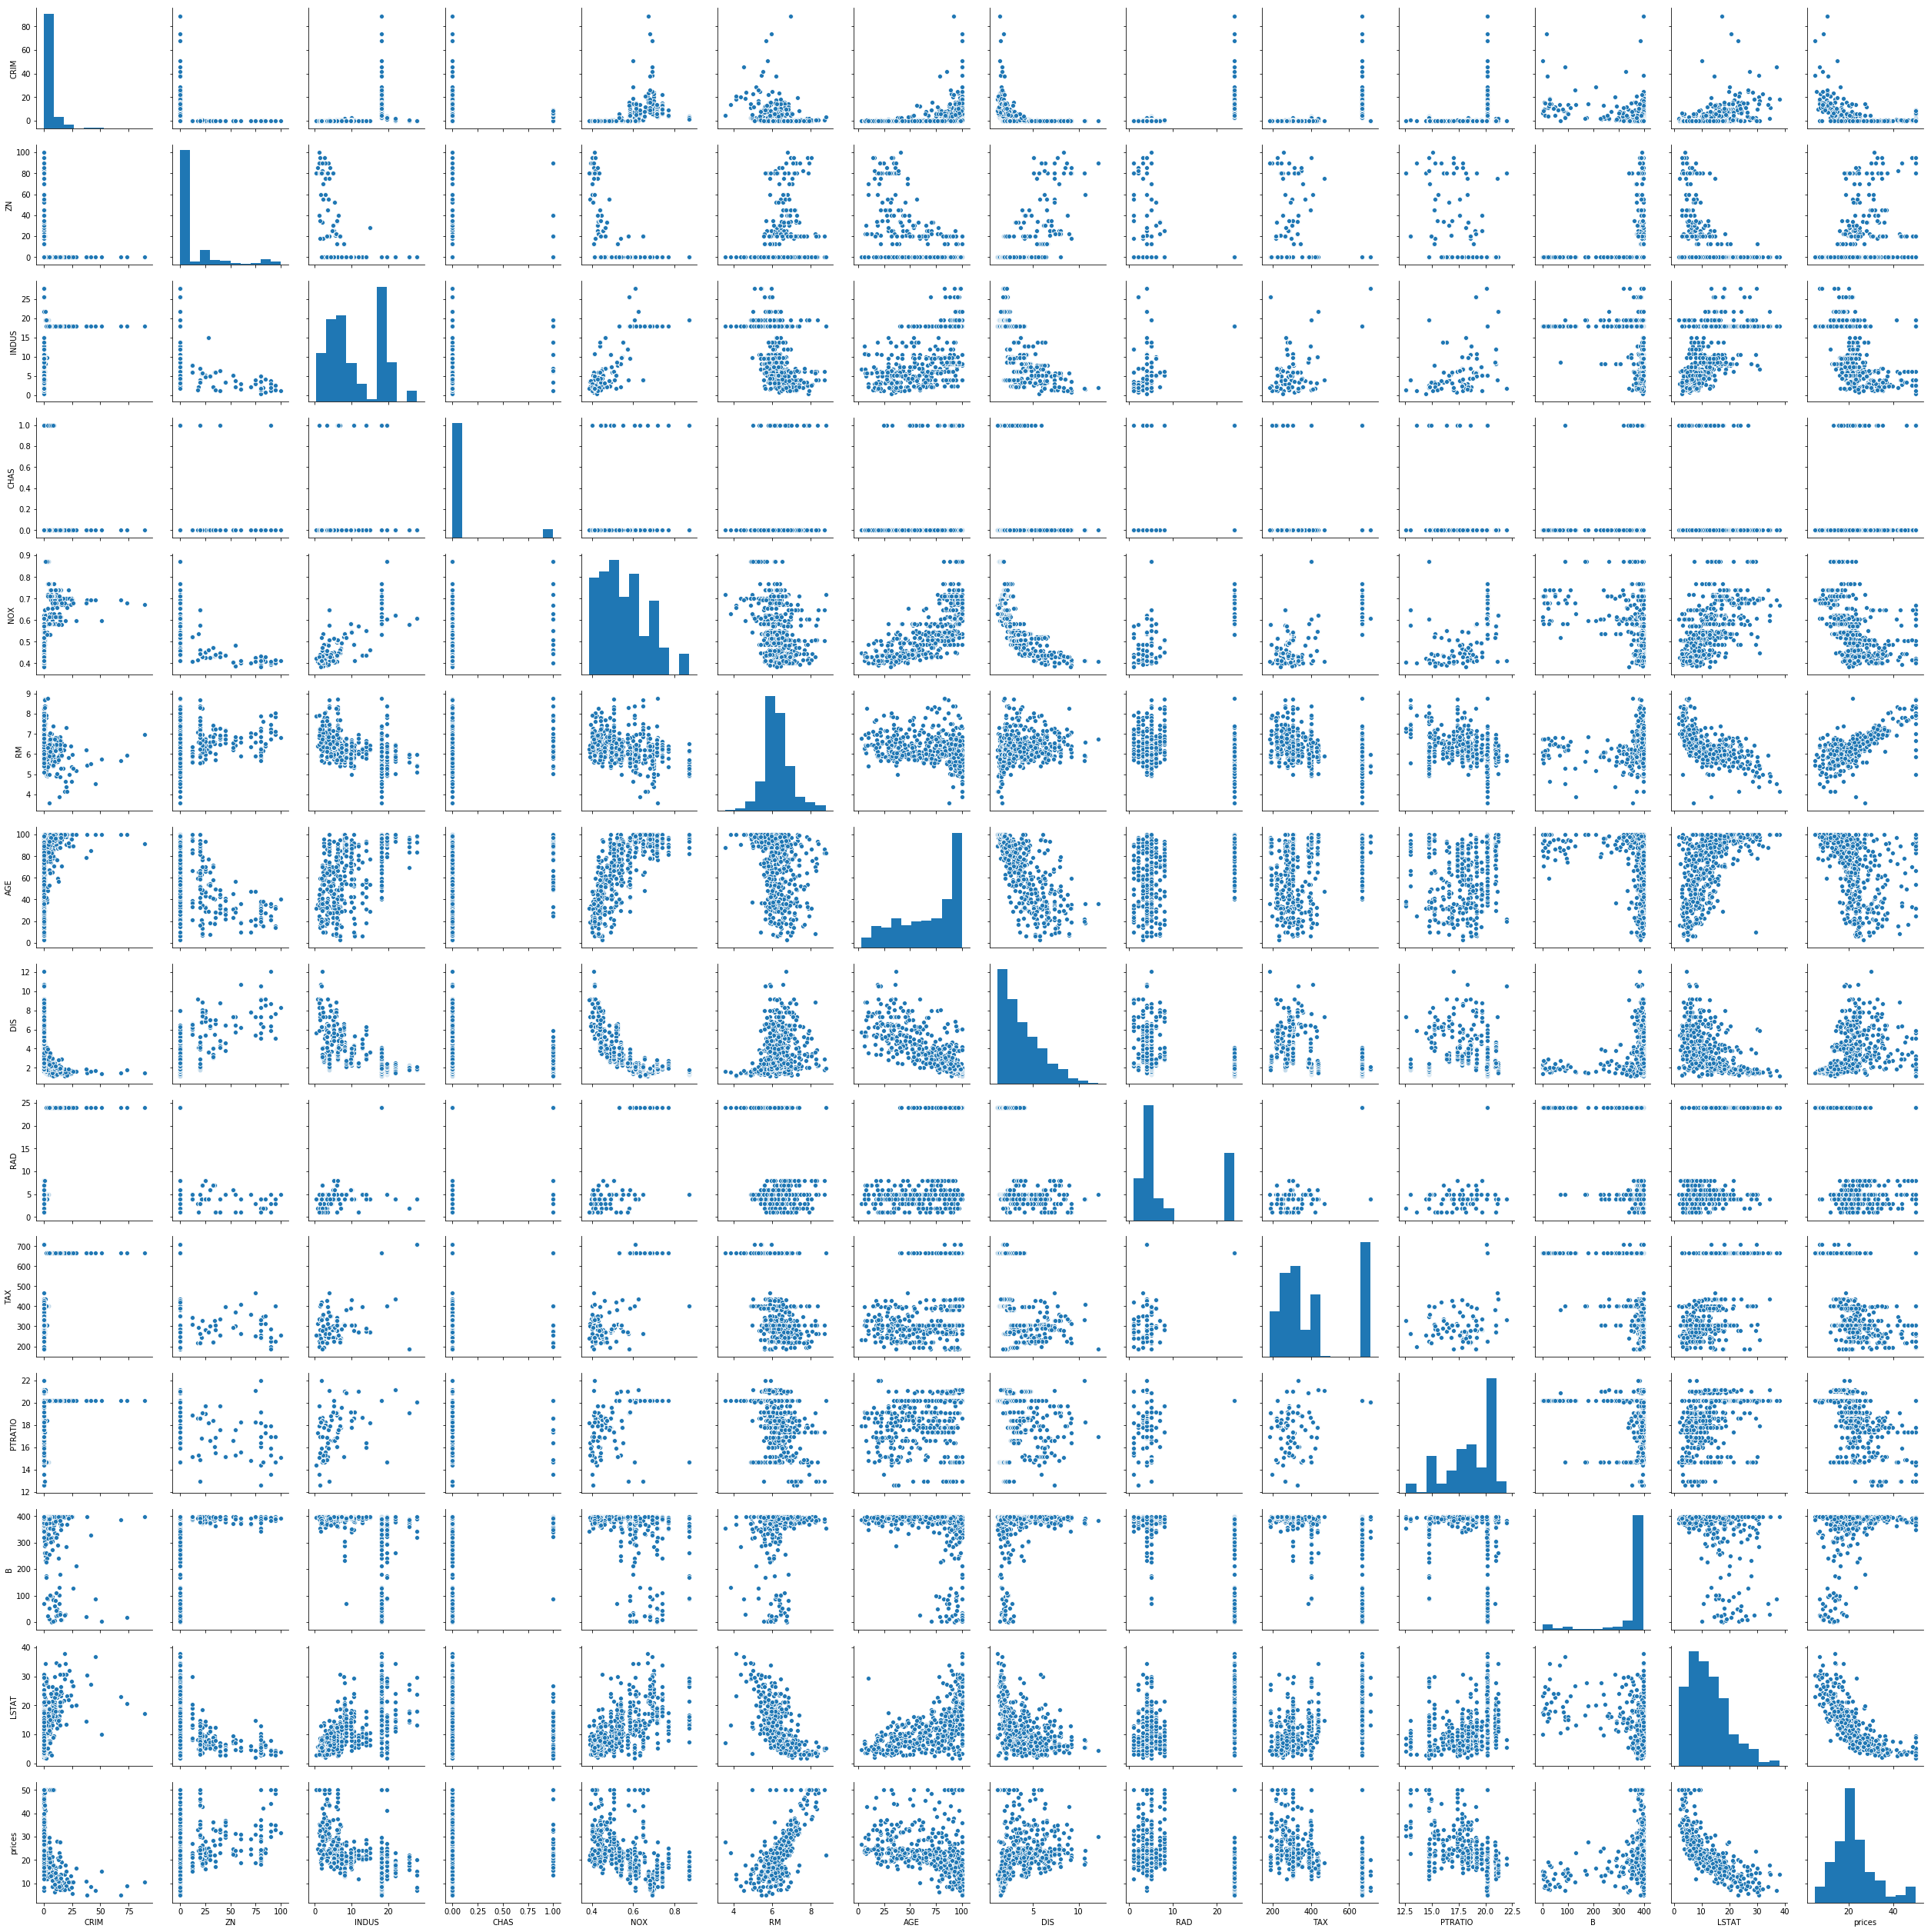

In [9]:
sns.pairplot(df)

### Definindo o X e o Y

In [10]:
X = df.drop('prices', axis=1)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [11]:
y = df['prices']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: prices, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Fitando o modelo

In [13]:
lm = LinearRegression()

model = lm.fit(X_train, y_train)

In [14]:
print('Ponto de interceptação do eixo: {:.2f} '.format(model.intercept_))

Ponto de interceptação do eixo: 41.48 


In [15]:
print('Numero de coeficientes: ', len(model.coef_))

Numero de coeficientes:  13


### Entendendo o quanto cada feature afeta os coeficientes

    - Podemos ver que, com aumento de 1 unidade NOX (medidos por partes por 10 milhões), as casas perdem aproximadamente 17,8 dollars em seu valor
    - Já o que mais agrega valor ao preço de uma casa em Boston, segundo o dataset, é o número de comodos que a casa possui. Cada comodo a mais, agrega em cerca de 3.6 Dóllars a mais.

In [16]:
data ={
    'Features': X.columns,
    'COEFS ESTIMADOS': model.coef_
}

coef_df = pd.DataFrame(data)
coef_df

Features  COEFS ESTIMADOS
0      CRIM        -0.112326
1        ZN         0.048544
2     INDUS         0.060590
3      CHAS         2.626572
4       NOX       -20.323872
5        RM         3.574128
6       AGE         0.005757
7       DIS        -1.489340
8       RAD         0.319675
9       TAX        -0.010983
10  PTRATIO        -1.069448
11        B         0.007220
12    LSTAT        -0.565495

### Visualizando um scatter plot para medir acuracidade do modelo

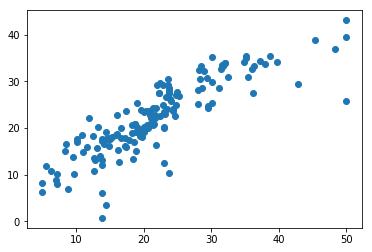

In [17]:
plt.scatter(y_test, lm.predict(X_test))

### Medindo o Score

In [18]:
print('A acuracidade do modelo foi de: {:.2f}%'.format(lm.score(X_test, y_test) * 100))

A acuracidade do modelo foi de: 72.85%
